<a href="https://colab.research.google.com/github/PhilippeJacques/Book-Rating/blob/Develop-Branch/PhilippeBookPredVersion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import numpy as np
import seaborn as sns
import scipy as sc
import statsmodels.api as sm

#Data Cleaning

We will start by importing the dataset into a pandas dataframe and remove those parameters which do not match the proper structure

We will remove all data having ratings count equal to zero as the rating count is our most leading feature for the decision process.

In [ ]:
warnings.filterwarnings("ignore")
df = pd.read_csv(r"livre.csv",sep=",", error_bad_lines=False,index_col="bookID")
df = df[df.ratings_count != 0]

In order to filter the num_pages column, will rename as accessing it through its current name gives me an error

After these actions which will for sure modify the data, we have to check what the data looks like now

In [ ]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969.00,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071.00,eng,870,2153167,29221,1/9/2004,Scholastic Inc.,NaN
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893.00,eng,352,6333,244,1/11/2003,Scholastic,NaN
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484.00,eng,435,2339585,36325,1/5/2004,Scholastic Inc.,NaN
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589.00,eng,2690,41428,164,9/13/2004,Scholastic,NaN
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780976540601.00,en-US,152,19,1,4/26/2005,Nimble Books,NaN
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780439827607.00,eng,3342,28242,808,12/9/2005,Scholastic,NaN
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957.00,eng,815,3628,254,1/11/2005,Gramercy Books,NaN
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747.00,eng,815,249558,4080,4/30/2002,Del Rey Books,NaN


 We will also remove books with no pages, that is number of pages equal zero for a book is by definition its content and it makes no sense to have a book without it.

First we list the column names for error-proof selection

In [ ]:
cf = list(df.columns)
print(cf)

['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher', 'Unnamed: 12']


We notice that num_pages has too much spaces at the beginning which we have to trim before appropriate selection, we will do the cleaning for all columns just in case.

In [ ]:
df.columns = df.columns.str.replace(" ","")

Now we remove all books with num_pages equal to zero meaning that they have no content

In [ ]:
df = df[df.num_pages != 0]
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969.00,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071.00,eng,870,2153167,29221,1/9/2004,Scholastic Inc.,NaN
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893.00,eng,352,6333,244,1/11/2003,Scholastic,NaN
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484.00,eng,435,2339585,36325,1/5/2004,Scholastic Inc.,NaN
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589.00,eng,2690,41428,164,9/13/2004,Scholastic,NaN
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780976540601.00,en-US,152,19,1,4/26/2005,Nimble Books,NaN
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780439827607.00,eng,3342,28242,808,12/9/2005,Scholastic,NaN
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957.00,eng,815,3628,254,1/11/2005,Gramercy Books,NaN
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780345453747.00,eng,815,249558,4080,4/30/2002,Del Rey Books,NaN


### Remarks :

The publication_date is arranged in month-day-year terms and the average_rating, num_pages,text_reviews_count, isbn and isbn13 are all in numerical values while the rest are in string values.

# Feature Engineering

The most interesting features here include the average_rating, num_pages, ratings_count, text_reviews_count. We have to draw a correlation plot, to determine the most appropriate feature

<function matplotlib.pyplot.show(close=None, block=None)>

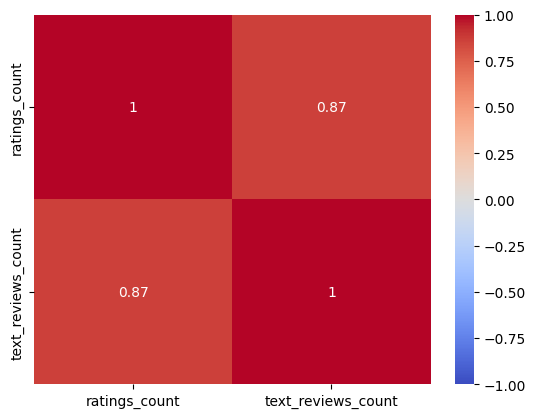

In [ ]:
df_corr = df[["average_rating", "num_pages","ratings_count", "text_reviews_count"]]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show